**Step 1**

 Financial time series Data


*  Russian Ruble (RUB) to US Dollar (USD) exchange rate
*  Ethereum cryptocurrency
*  Apple Stcock



**Step 2a**

In [57]:
# import the necessary library
import datetime
import numpy as np
import pandas as pd
import yfinance as yf
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy.stats import norm

In [58]:
start_date= datetime.date(2019, 9, 1)
end_date = datetime.date(2022, 9, 30)
ticker = ['RUBUSD=X','ETH-USD', 'AAPL']
df = pd.DataFrame()
timedata = yf.download(ticker, start=start_date, end=end_date, interval="1d")
timedata.index = timedata.index.date
df[ticker] = timedata['Adj Close']

[*********************100%%**********************]  3 of 3 completed


In [59]:
df.head()

,RUBUSD=X,ETH-USD,AAPL
2019-09-01,NaN,171.629425,NaN
2019-09-02,NaN,178.347351,0.014984
2019-09-03,50.015724,179.499329,0.014980
2019-09-04,50.864319,175.992889,0.014982
2019-09-05,51.858791,174.217133,0.015108


In [60]:
df.dropna(inplace=True)
df = df.pct_change(axis=0)

In [61]:
df.dropna(inplace=True)
df.head()

,RUBUSD=X,ETH-USD,AAPL
2019-09-04,0.016967,-0.019535,0.000166
2019-09-05,0.019551,-0.010090,0.008377
2019-09-06,-0.000094,-0.024458,0.000364
2019-09-09,0.004267,0.065860,0.006214
2019-09-10,0.011813,-0.007520,0.003721


creating a line plot of the data using the index

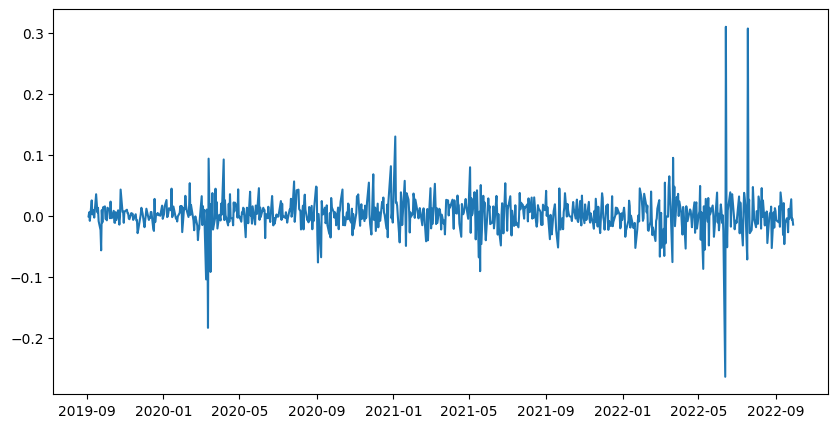

In [62]:
plt.figure(figsize=(10,5))
plt.plot(df.index, df.mean(axis=1))
plt.show()

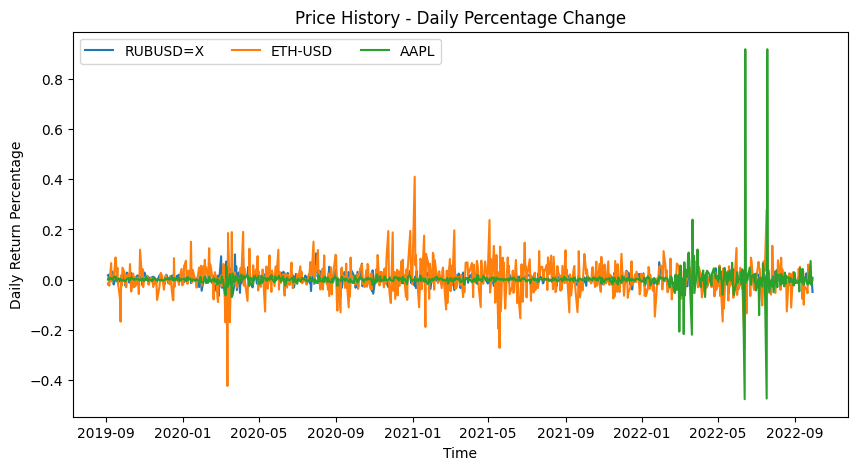

In [63]:
plt.figure(figsize=(10,5))
plt.plot(df.index, df)
plt.legend(ticker, loc='upper left', ncol=3)
plt.title("Price History - Daily Percentage Change")
plt.xlabel("Time")
plt.ylabel("Daily Return Percentage")
plt.show();

Dispersion of the Daily Returns of the Assets

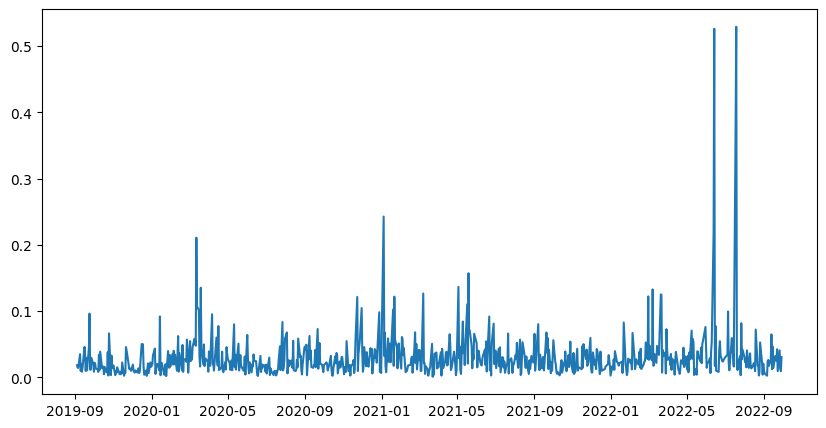

In [64]:
# # df = df.std(axis=1)
df = df.std(axis=1)
df = df.dropna(axis=0)
plt.figure(figsize = (10, 5))
plt.plot(df.index, df)
plt.show()

The histogram visualization below shows a fit for hidden Markov model to be used to model the time series data.


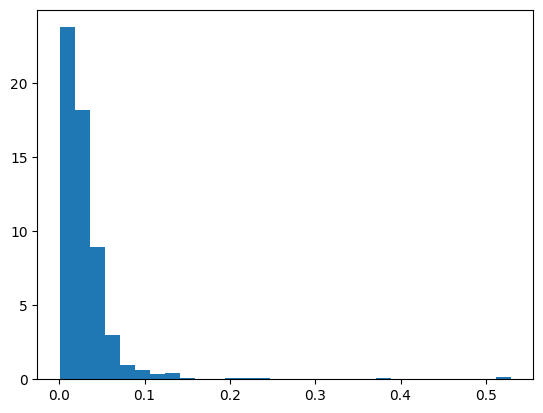

In [65]:
count, bins, ignored = plt.hist(df, 30, density=True)

Applying the natural logarithm transformation and then visualizes the transformed data as a line plot

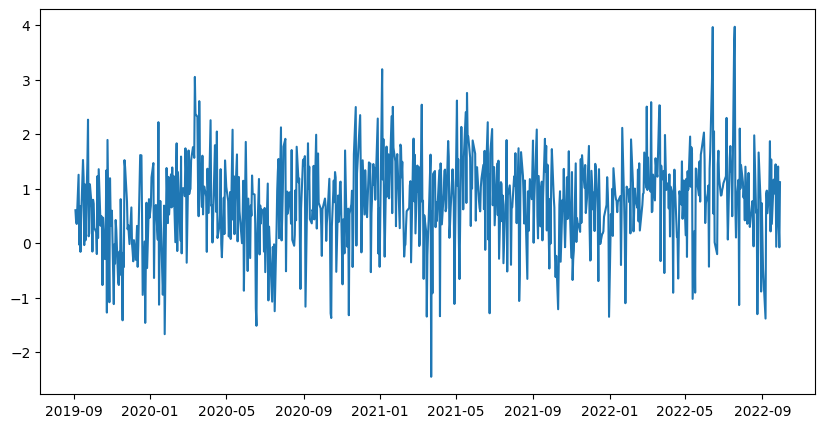

In [66]:
# df.dropna(inplace=True)
df = np.log(100* df)
plt.figure(figsize=(10, 5))
plt.plot(df.index, df)
plt.show()

The Histogram visualizes the distribution of the data points, providing insights into the frequency and density within different intervals.

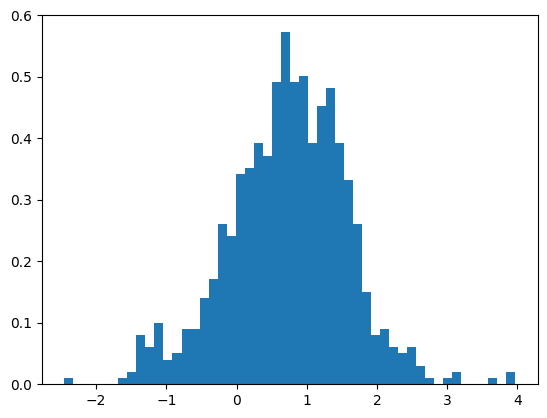

In [67]:
count, bins, ignored = plt.hist(df, 50, density=True)
plt.show()